### Gerar um modelo preditivo de classificação (variável target: ‘default.payment.next.month’), separe 30% da base para teste e traga métricas para validar o modelo em questão. 


In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore") 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV 

In [2]:
#Comando para exibir todas colunas do arquivo
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Importação dos dados

In [3]:
# Conectando so drive para acessar a base
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Carregamento dos dados que estão no meu drive
df = pd.read_csv("/content/drive/MyDrive/CASES/4Inteligente/UCI_Credit_Card.csv")

In [5]:
# Verificando o tamanho da base
df.shape

(30000, 25)

In [6]:
# Linhas iniciais do DataFrame
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
# Colunas existentes no dataframe
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

## Analise Exploratória e Tratamento de Dados

In [8]:
# Verificando as estruturas dos dados
# Percebemos que as variáveis são inteiras ou floats

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
# Vamos excluir a coluna ID, que não agrega informação para o modelo
df.drop('ID', axis=1, inplace=True)

In [10]:
# Verificando a existência de valores nulos 
# Não existem valores nulos no dataframe
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [11]:
# Medidas estatisticas
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


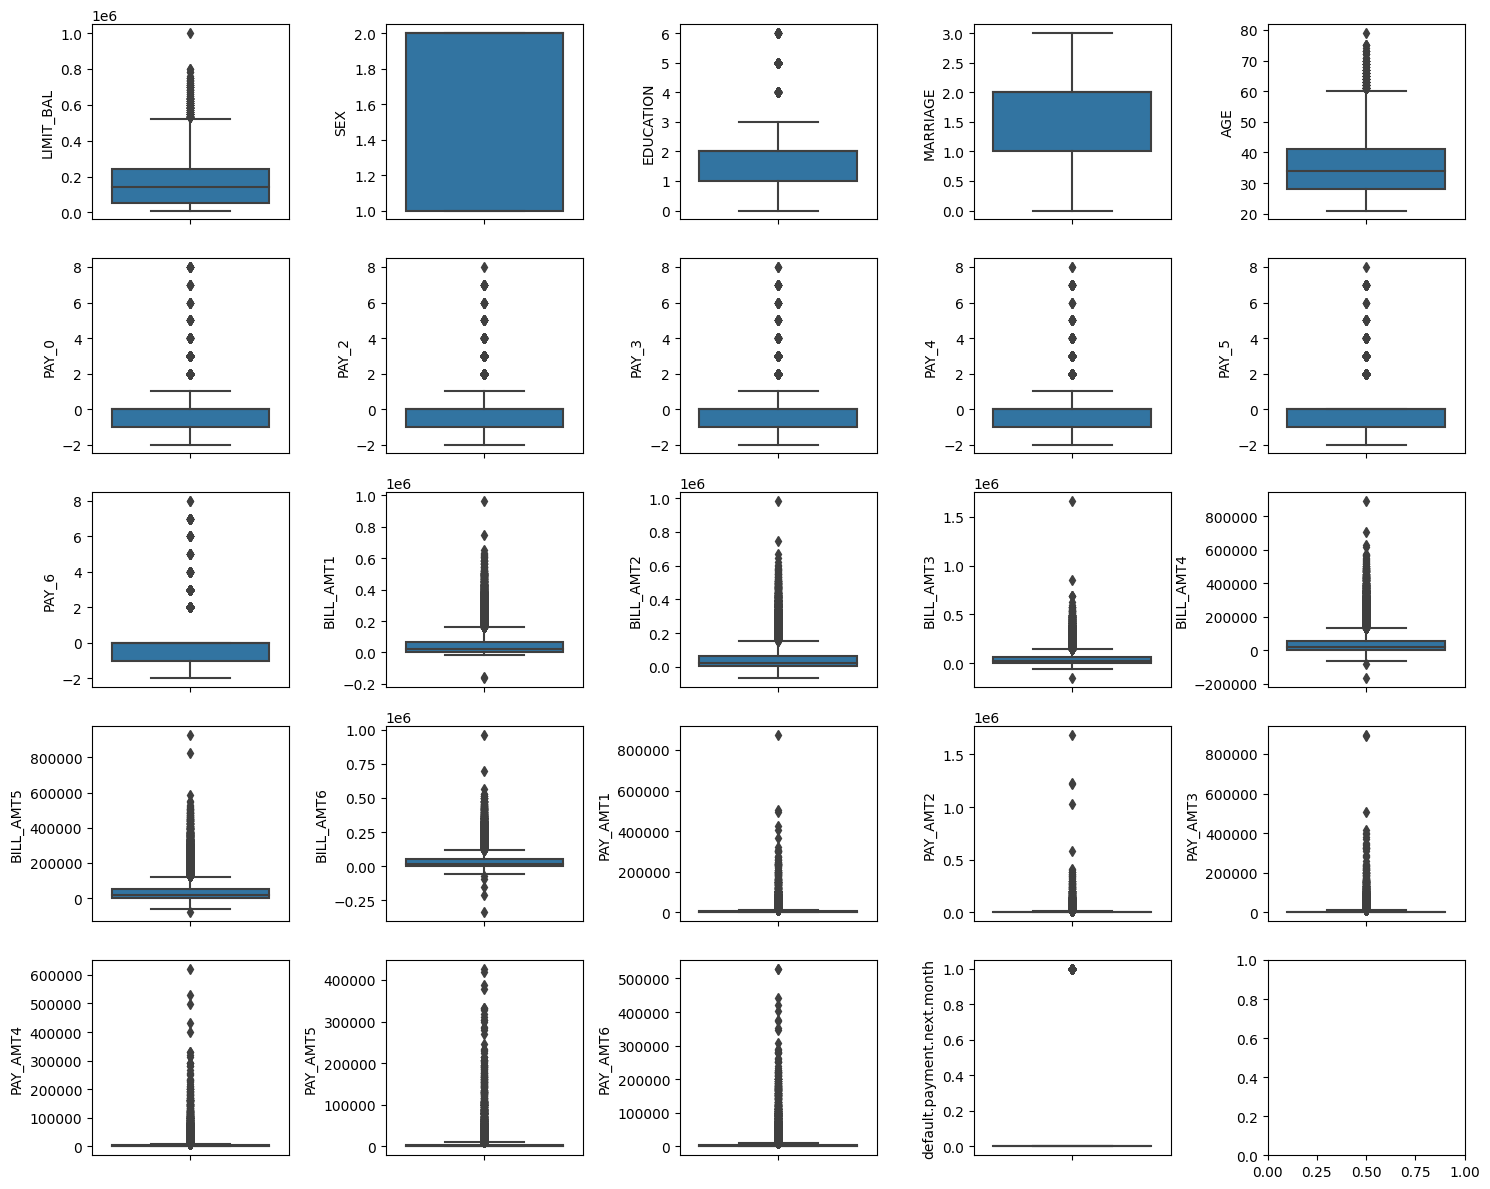

In [12]:
# Verificando a existência de outilers com o boxplot

plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(5, 5) #5 linhas com 5 colunas

linha = 0
coluna = 0

for i in df:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0            

plt.show()

## Pré Processamento dos Dados

In [13]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
# Separando a variável target
target = df['default.payment.next.month']
target.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [15]:
# Separando o conjunto X
X = df.drop('default.payment.next.month', axis=1)
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [16]:
# Divisão o conjunto de dados em Treino-70% e Teste-30%.
X_treino, X_teste, y_treino, y_teste = train_test_split( X, target, test_size = 0.3, random_state = 1)

In [17]:
# Normalização o conjunto de dados

sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

## Costruindo o modelo de classificação

In [18]:
# Instanciando o Modelo de lassificação
clf = RandomForestClassifier()

In [19]:
# Valores para o hiperparametros
n_estimators = np.array([10, 20, 50])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])


# Grid com os hiperparâmetros
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

# Criando o modelo com o Grid de Hiperparametros
clf = GridSearchCV(clf, grid_parametros, cv = 5)

# Treinando os modelos
inicio = time.time()
clf.fit(X_treino_normalizados, y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos = pd.DataFrame(clf.cv_results_)

In [20]:
# Acurácia do modelo
print(f"Acurácia em Treinamento: {clf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {clf.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos.shape[0])

Acurácia em Treinamento: 82.26%

Hiperparâmetros Ideais: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

Tempo de Treinamento do Modelo:  3445.6

Numero de treinamentos realizados:  324


In [21]:
# Visualizando os parametros e treinos do modelo
treinos.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003987,0.001123,0.000000,0.000000,gini,10,sqrt,1,1,10,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
1,0.003731,0.000454,0.000000,0.000000,gini,10,sqrt,1,1,20,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
2,0.003180,0.000324,0.000000,0.000000,gini,10,sqrt,1,1,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
3,1.114640,0.320461,0.018307,0.006570,gini,10,sqrt,1,2,10,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.819524,0.809762,0.816190,0.814286,0.821190,0.816190,0.004027,152
4,1.271271,0.137931,0.025116,0.006528,gini,10,sqrt,1,2,20,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.819048,0.812619,0.819762,0.820476,0.825476,0.819476,0.004106,51


In [22]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 50, criterion = 'entropy', max_depth = 10, max_features = None,
                              min_samples_leaf = 1, min_samples_split = 2)

# Construção do modelo
clf = clf.fit(X_treino_normalizados, y_treino)

In [23]:
# Estamos apenas "simulando" os dados de teste
scores = clf.score(X_treino_normalizados,y_treino)
scores

0.8559523809523809

In [24]:
# Estamos apenas "simulando" os dados de teste
scores = clf.score(X_teste_normalizados,y_teste)
scores

0.8191111111111111

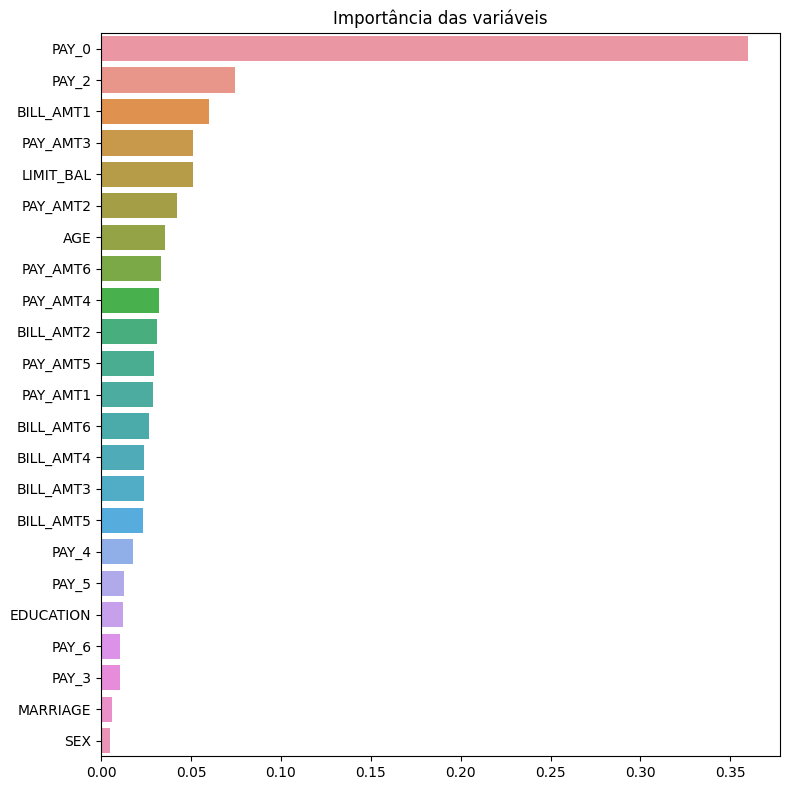

In [25]:
# Exibindo a importancia de cada variavel no modelo preditivo
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância das variáveis')
plt.show()

In [26]:
# Calculo da porcentagem da importancia de cada variável
importances.sort_values(ascending = False)

PAY_0        0.359674
PAY_2        0.074701
BILL_AMT1    0.060066
PAY_AMT3     0.051169
LIMIT_BAL    0.051002
PAY_AMT2     0.041946
AGE          0.035478
PAY_AMT6     0.033352
PAY_AMT4     0.031993
BILL_AMT2    0.031243
PAY_AMT5     0.029287
PAY_AMT1     0.028772
BILL_AMT6    0.026687
BILL_AMT4    0.024021
BILL_AMT3    0.023681
BILL_AMT5    0.023391
PAY_4        0.017520
PAY_5        0.012478
EDUCATION    0.011849
PAY_6        0.010372
PAY_3        0.010308
MARRIAGE     0.005852
SEX          0.005159
dtype: float64

#Desta forma podemos destacar que as variáveis mais importante são os pagamentos iniciais e os limites. O fato do cliente ser do sexo masculino, feminio, ser casado ou não, quase que não influência se haverá ou não o pagamento da sua dívida.